# Q-learning applied to FrozenLake 

#### **Remember**: Q-learning is a model free, off-policy algorithm that can be used to find an optimal action using a Q function. Q can be represented as a table that contains a value for each pair state-action
    
To review Q-learning watch [Q learning explained by Siraj](https://www.youtube.com/watch?v=aCEvtRtNO-M)

#### Q-learning pipeline is quite easy an can be summarised in 5 blocks:

![as](img/short_diag.jpg)

## WHAT'S THE ENVIRONMENT?

#### We'll apply Q-learning on a [Gym](http://gym.openai.com/) game called [FrozenLake](https://gym.openai.com/envs/FrozenLake-v0/)

![](img/frozenlake_v0.png)

## LET'S START TO CODE

In [1]:
import gym
import random
from collections import namedtuple
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### BASIC FUNCTION TO CHOOSE AN ACTION FOLLOWING DIFFERENT POLICIES

In [2]:
def select_eps_greedy_action(table, obs, n_actions):
    '''
    Select the action using a ε-greedy policy (add a randomness ε for the choice of the action)
    '''
    value, action = best_action_value(table, obs)

    if random.random() < epsilon:
        return random.randint(0,n_actions-1)
    else:
        return action

def select_greedy_action(table, obs, n_actions):
    '''
    Select the action using a greedy policy (take the best action according to the policy)
    '''
    value, action = best_action_value(table, obs)
    return action


def best_action_value(table, state):
    '''
    Exploring the table, take the best action that maximize Q(s,a)
    '''
    best_action = 0
    max_value = 0
    for action in range(n_actions):
        if table[(state, action)] > max_value:
            best_action = action
            max_value = table[(state, action)]

    return max_value, best_action

![](img/Q_function.png)

In [3]:
def Q_learning(table, obs0, obs1, reward, action):
    '''
    Q-learning. Update Q(obs0,action) according to Q(obs1,*) and the reward just obtained
    '''
    
    # Take the best value reachable from the state obs1
    best_value, _ = best_action_value(table, obs1)

    # Calculate Q-target value 
    Q_target = reward + GAMMA * best_value

    # Calculate the Q-error between the target and the previous value
    Q_error = Q_target - table[(obs0, action)]

    # Update Q(obs0,action)
    table[(obs0, action)] += LEARNING_RATE * Q_error

### TEST THE POLICY

In [4]:
def test_game(env, table):
    '''
    Test the new table playing TEST_EPISODES games
    '''
    
    n_actions = env.action_space.n
    
    reward_games = []
    for _ in range(TEST_EPISODES):
        obs = env.reset()
        rewards = 0
        while True:
            # Act greedly 
            next_obs, reward, done, _ = env.step(select_greedy_action(table, obs, n_actions))
            obs = next_obs
            rewards += reward

            if done:
                reward_games.append(rewards)
                break

    return np.mean(reward_games)

### MAIN PROCEDURE

In [5]:
# Some hyperparameters..
GAMMA = 0.95

# NB: the decay rate allow to regulate the Exploration - Exploitation trade-off
#     start with a EPSILON of 1 and decay until reach 0
EPS_DECAY_RATE = 0.9993

LEARNING_RATE = 0.8

# .. and constants
TEST_EPISODES = 100
MAX_GAMES = 15000

	Ep: 999 Test reward: 0.3 0.5
	Ep: 1999 Test reward: 0.56 0.25
	Ep: 2999 Test reward: 0.71 0.12
	Ep: 3999 Test reward: 0.7 0.06
	Ep: 4999 Test reward: 0.19 0.03
	Ep: 5999 Test reward: 0.0 0.01
	Ep: 6999 Test reward: 0.78 0.01
	Ep: 7999 Test reward: 0.74 0.0
	Ep: 8999 Test reward: 0.8 0.0
	Ep: 9999 Test reward: 0.77 0.0
	Ep: 10999 Test reward: 0.77 0.0
	Ep: 11999 Test reward: 0.74 0.0
	Ep: 12999 Test reward: 0.7 0.0
	Ep: 13999 Test reward: 0.75 0.0
	Ep: 14999 Test reward: 0.75 0.0


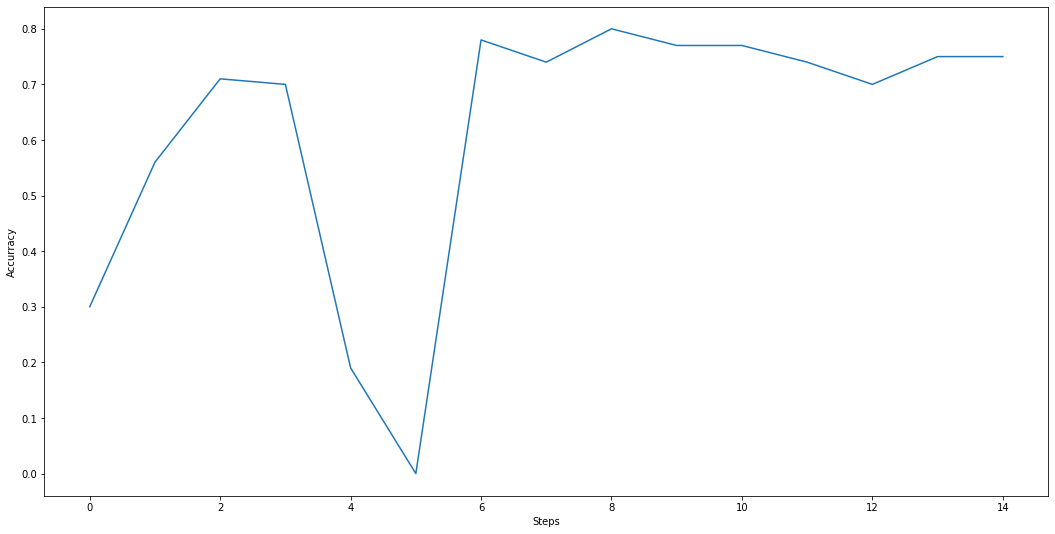

In [8]:
# Create the environment
#env = gym.make('Taxi-v2')
env = gym.make("FrozenLake-v0")
obs = env.reset()

obs_length = env.observation_space.n
n_actions = env.action_space.n

reward_count = 0
games_count = 0

# Create and initialize the table with 0.0
table = collections.defaultdict(float)
    
test_rewards_list = []

# Reinitialize epsilon after each session
epsilon = 1.0

while games_count < MAX_GAMES:

    # Select the action following an ε-greedy policy
    action = select_eps_greedy_action(table, obs, n_actions)
    next_obs, reward, done, _ = env.step(action)

    # Update the Q-table
    Q_learning(table, obs, next_obs, reward, action)

    reward_count += reward
    obs = next_obs

    if done:
        epsilon *= EPS_DECAY_RATE

        # Test the new table every 1k games
        if (games_count + 1) % 1000 == 0:
            test_reward = test_game(env, table)
            print('\tEp:', games_count, 'Test reward:', test_reward, np.round(epsilon,2))

            test_rewards_list.append(test_reward)

        obs = env.reset()
        reward_count = 0
        games_count += 1    

# Plot the accuracy over the number of steps
plt.figure(figsize=(18,9))
plt.xlabel('Steps')
plt.ylabel('Accurracy')
plt.plot(test_rewards_list)
plt.show()

#### NB: in case you want to apply Q-learning to continuous state and actions games, you have to quantize the state and action spaces